In [89]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [90]:
salary_train=pd.read_csv("SalaryData_Test(1).csv")
salary_test=pd.read_csv("SalaryData_Test(1).csv")

In [91]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [92]:
salary_train["Salary"].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [93]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.9)})

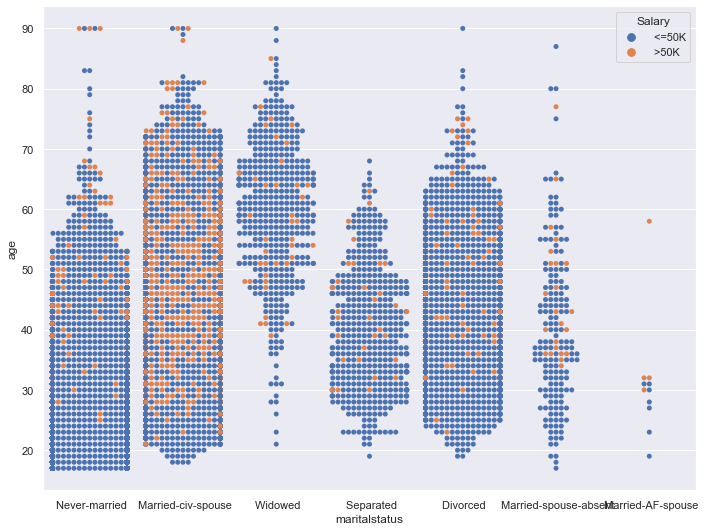

In [94]:
sns.swarmplot(y='age',x='maritalstatus', hue="Salary", data=salary_train);

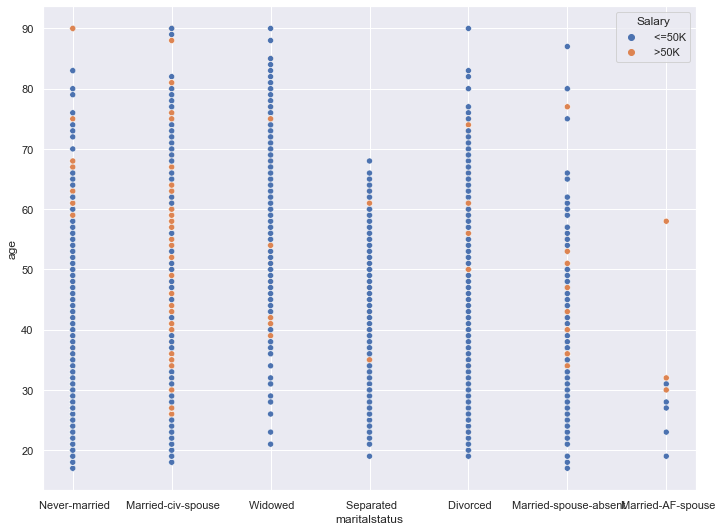

In [95]:
sns.scatterplot(y='age',x='maritalstatus', hue="Salary", data=salary_train);

<AxesSubplot:xlabel='age', ylabel='count'>

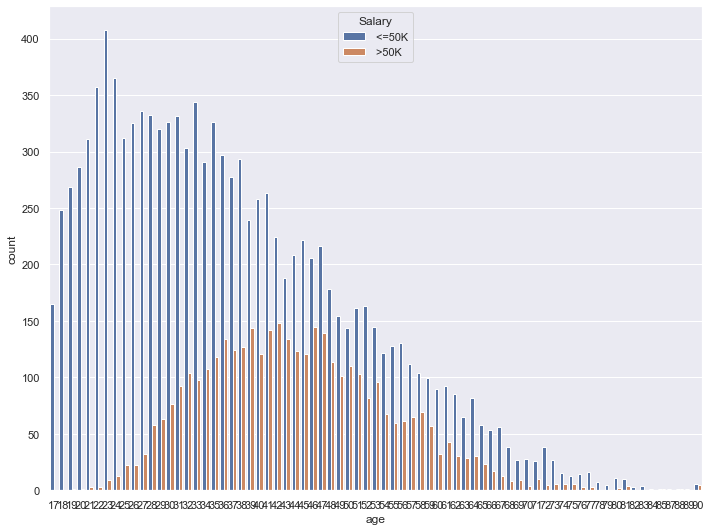

In [96]:
sns.countplot("age",hue="Salary", data=salary_train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

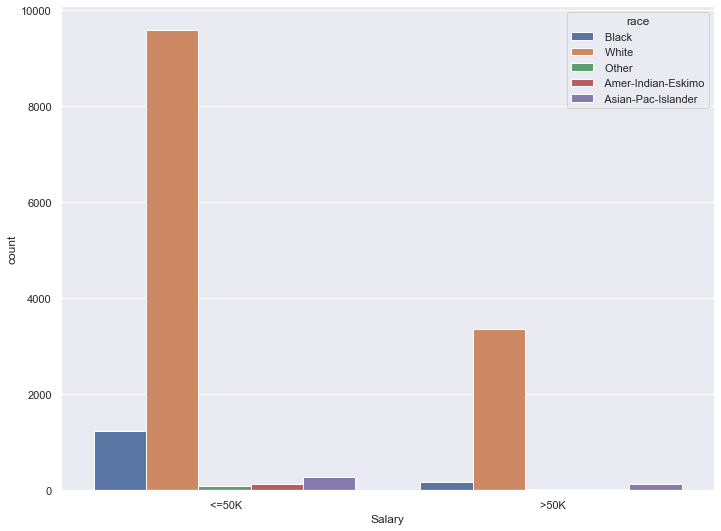

In [97]:
sns.countplot(x="Salary",hue="race",data=salary_train)

In [98]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:xlabel='Salary', ylabel='count'>

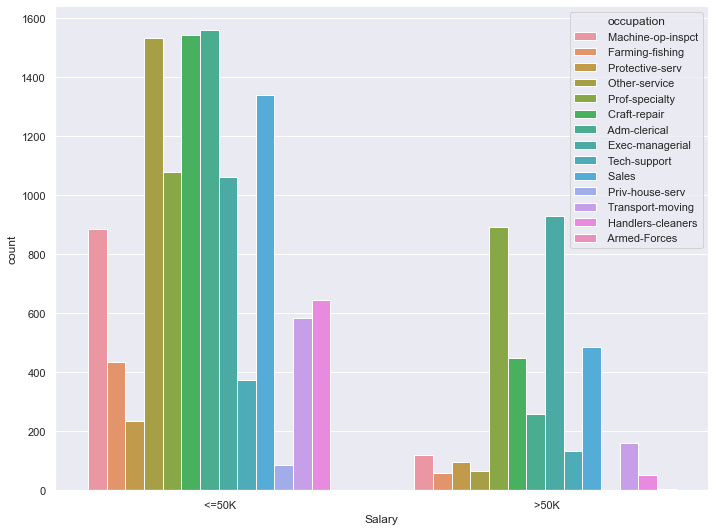

In [99]:
sns.countplot(x="Salary",hue="occupation",data=salary_train)

<AxesSubplot:xlabel='occupation', ylabel='age'>

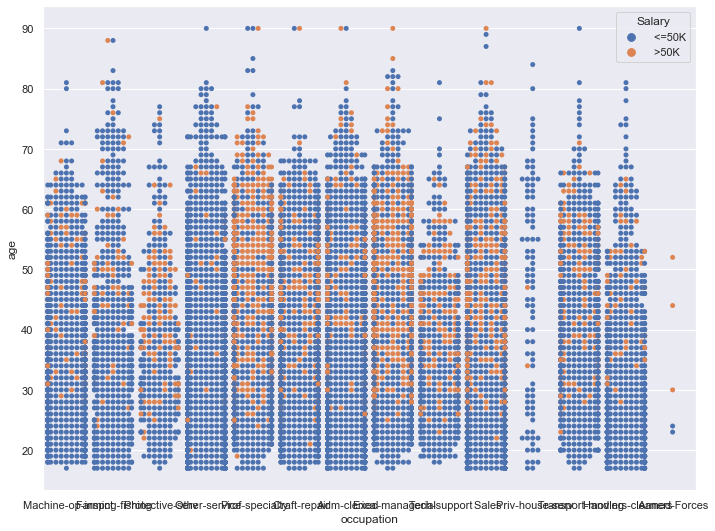

In [101]:
sns.swarmplot(x="occupation",y="age", hue="Salary",data=salary_train)

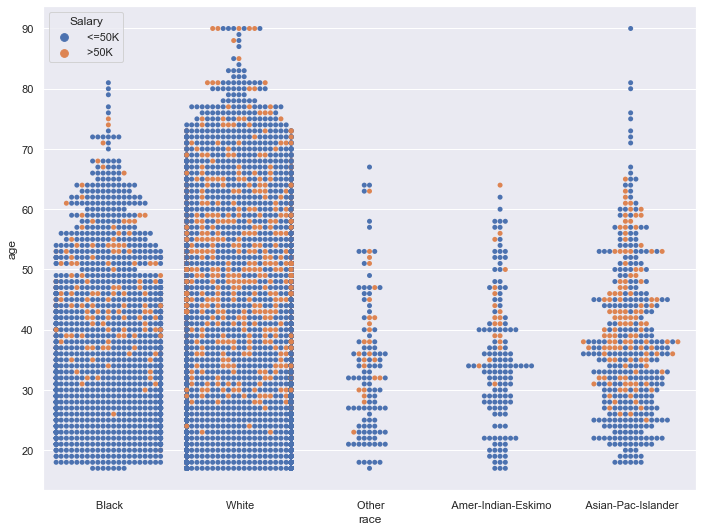

In [102]:
sns.swarmplot(x="race",y="age", hue="Salary",data=salary_train);

<AxesSubplot:xlabel='age', ylabel='educationno'>

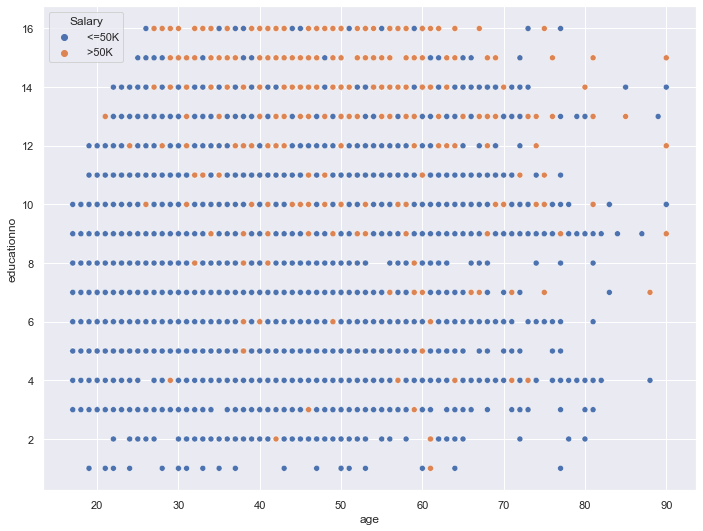

In [103]:
sns.scatterplot(x='age',y="educationno",hue="Salary",data=salary_train)

In [104]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [105]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [106]:
categorical=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

In [107]:
salary_train[categorical]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [110]:
workclass_coder=LabelEncoder()
education_coder=LabelEncoder()
maritalstatus_coder=LabelEncoder()
occupation_coder=LabelEncoder()
relationship_coder=LabelEncoder()
race_coder=LabelEncoder()
sex_coder=LabelEncoder()
native_coder=LabelEncoder()
Salary_coder=LabelEncoder()

In [111]:
coders=[workclass_coder,education_coder,maritalstatus_coder,occupation_coder,relationship_coder,race_coder,sex_coder,native_coder,Salary_coder]

In [112]:
n_salary=pd.DataFrame()
j=0
for i in categorical:
    n_salary[i]=pd.DataFrame(coders[j].fit_transform(salary_train[i]),columns=[i])
    j+=1
n_salary.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,2,1,4,6,3,2,1,37,0
1,2,11,2,4,0,4,1,37,0


In [113]:
def coder_test(data):
    coders
    categorical=['workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
    n_salary_t=pd.DataFrame()
    j=0
    for i in categorical:
        n_salary_t[i]=pd.DataFrame(coders[j].transform(data[i]),columns=[i])
        j+=1
    return n_salary_t

In [115]:
salary_train[categorical]=n_salary

In [116]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [117]:
x=salary_train.drop("Salary",axis=1)
y=salary_train["Salary"]

In [118]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [120]:
gsv.best_params_ , gsv.best_score_


({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7608897742363878)

In [127]:
salary_test=pd.read_csv("SalaryData_Test(1).csv")

In [128]:
salary_test[categorical]=coder_test(salary_test)

In [121]:
clf = SVC(C=15,gamma=0.5,kernel="rbf")

In [129]:
x_test=salary_test.drop("Salary",axis=1)
y_test=salary_test["Salary"]

In [130]:
clf.fit(x,y)
clf.score(x_test,y_test)

0.9826029216467463